In [22]:
# Importing libraries

import os, csv, random, math
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
# path to the data file
path = '../defects/data/Jureczko/augmented_data/ant.csv'

In [24]:
# reading the data
data = pd.read_csv(path)
rows, cols = data.shape
print("Rows:",rows,"\nCols:",cols)

Rows: 2692 
Cols: 21


### Choosing k best features

In [25]:
#Univariate feature selection
X = data.loc[:,data.columns!='$<bug']
y = data.loc[:,data.columns=='$<bug']
print("X",X.shape)
print("y",y.shape)

X (2692, 20)
y (2692, 1)


In [41]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_new.shape

(2692, 10)

### Using variance threshold

In [38]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

X_new = variance_threshold_selector(X)
print(X_new.shape)

(2692, 16)


### Removing highly correlated features

In [49]:
corr_matrix = data.corr().abs()

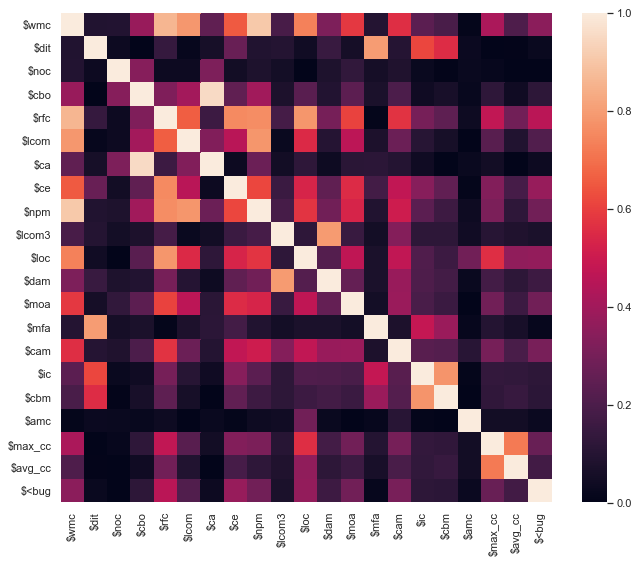

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix)

In [58]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

for thresh in [0.75,0.8,0.85,0.9,0.95]:
    to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
    print(thresh,"\t",to_drop,"\t",len(to_drop))

0.75 	 ['$rfc', '$lcom', '$ca', '$ce', '$npm', '$loc', '$dam', '$mfa', '$cbm'] 	 9
0.8 	 ['$rfc', '$ca', '$npm'] 	 3
0.85 	 ['$rfc', '$ca', '$npm'] 	 3
0.9 	 ['$ca', '$npm'] 	 2
0.95 	 ['$ca'] 	 1


In [64]:
## removing the selected features
data_new = data.drop(to_drop, axis=1)
print(data_new.shape)
print(data_new.columns)

(2692, 20)
Index(['$wmc', '$dit', '$noc', '$cbo', '$rfc', '$lcom', '$ce', '$npm',
       '$lcom3', '$loc', '$dam', '$moa', '$mfa', '$cam', '$ic', '$cbm', '$amc',
       '$max_cc', '$avg_cc', '$<bug'],
      dtype='object')
